<a href="https://colab.research.google.com/github/savindiperera/Customer_churn_prediction/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import joblib
import tensorflow as tf

In [2]:

#Import data
telco_churn = pd.read_csv("/content/drive/MyDrive/MLCW/telco_churn.csv")

telco_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [4]:
print("Rows: " ,telco_churn.shape[0])
print("Columns: " ,telco_churn.shape[1])

#Column names
print(telco_churn.columns)

#Data types
print(telco_churn.dtypes)

#Missing values
print("Missing Values")
print(telco_churn.isnull().sum())

#Duplicate values
print("Duplicate Values")
print(telco_churn.duplicated().sum())

Rows:  7043
Columns:  21
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype:

In [5]:
#Statistical summary
print("stats")
print(telco_churn.describe())


stats
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
print("Target Variable")
print(telco_churn['Churn'].value_counts())

print("\nPercentage of Target Variable:")
print((telco_churn['Churn'].value_counts()/telco_churn.shape[0]*100).round(2))

Target Variable
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage of Target Variable:
Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


In [8]:
datacopy = telco_churn.copy()

for col in datacopy:
    if datacopy[col].dtype == "object":
        datacopy[col] = datacopy[col].astype(str).str.strip()
datacopy.drop(columns=['customerID'],inplace=True)
datacopy.drop(columns=['TotalCharges'],inplace=True)
datacopy.drop(columns=['MonthlyCharges'],inplace=True)
datacopy.drop(columns=['tenure'],inplace=True)
# Show unique values
for col in datacopy:
    if col in datacopy:
        print(f"\nUnique values in {col}:")
        print(datacopy[col].value_counts())


Unique values in gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Unique values in Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values in Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values in PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values in MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values in InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values in OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No

In [9]:
for col in telco_churn:
  unkown =(telco_churn[col] == ' ').sum()
  print(f"{col}: {unkown} unkown values")

customerID: 0 unkown values
gender: 0 unkown values
SeniorCitizen: 0 unkown values
Partner: 0 unkown values
Dependents: 0 unkown values
tenure: 0 unkown values
PhoneService: 0 unkown values
MultipleLines: 0 unkown values
InternetService: 0 unkown values
OnlineSecurity: 0 unkown values
OnlineBackup: 0 unkown values
DeviceProtection: 0 unkown values
TechSupport: 0 unkown values
StreamingTV: 0 unkown values
StreamingMovies: 0 unkown values
Contract: 0 unkown values
PaperlessBilling: 0 unkown values
PaymentMethod: 0 unkown values
MonthlyCharges: 0 unkown values
TotalCharges: 11 unkown values
Churn: 0 unkown values


# **Visualization**

In [10]:
eda_data = telco_churn.copy()
eda_data['TotalCharges'] = pd.to_numeric(eda_data['TotalCharges'], errors='coerce')
eda_data['Churn'] = eda_data['Churn'].map({'No': 0, 'Yes': 1})

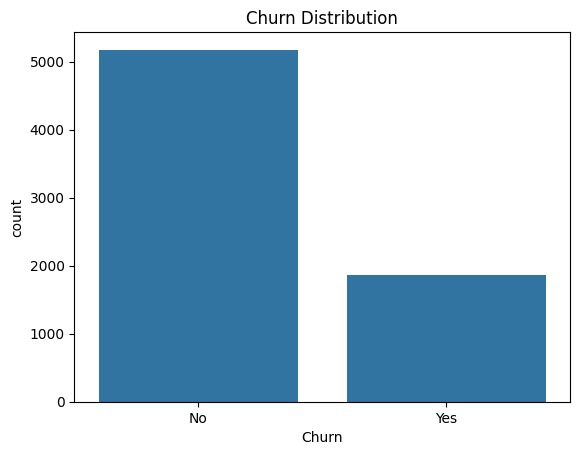

In [12]:
sns.countplot(x="Churn", data=telco_churn)
plt.title("Churn Distribution")
plt.show()

In [13]:
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']

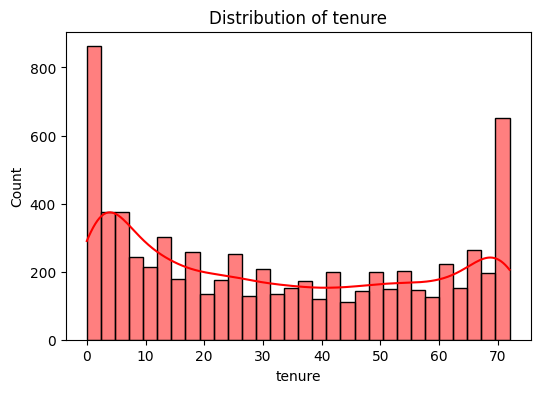

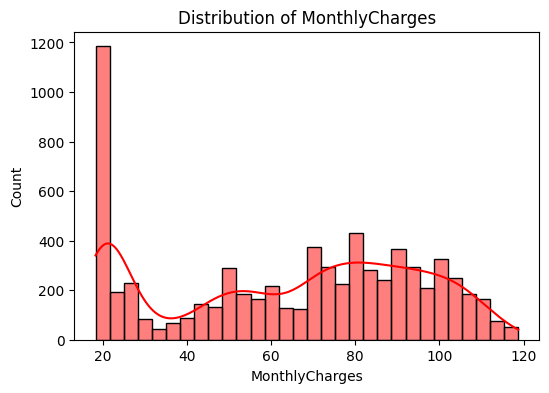

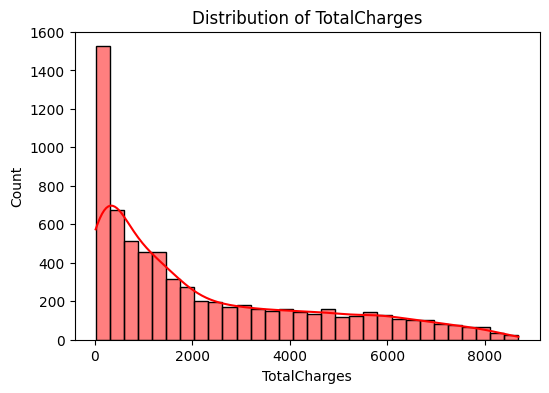

In [14]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(eda_data[col], kde=True, bins=30, color='red')
    plt.title(f"Distribution of {col}")
    plt.show()

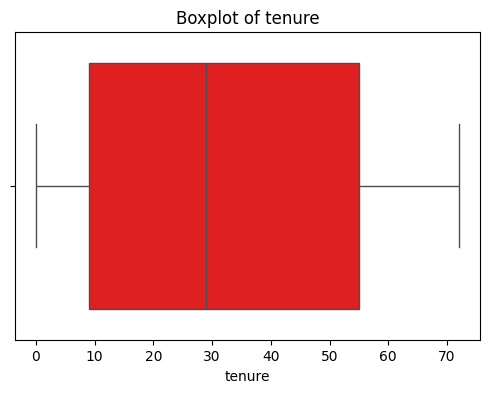

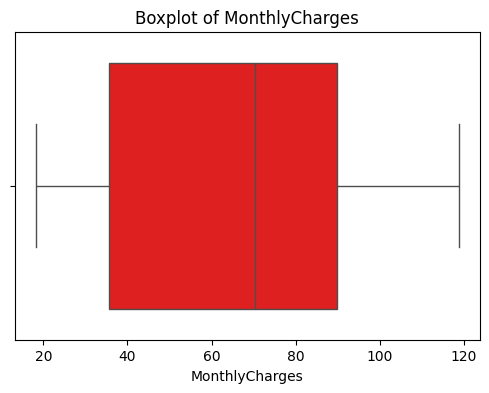

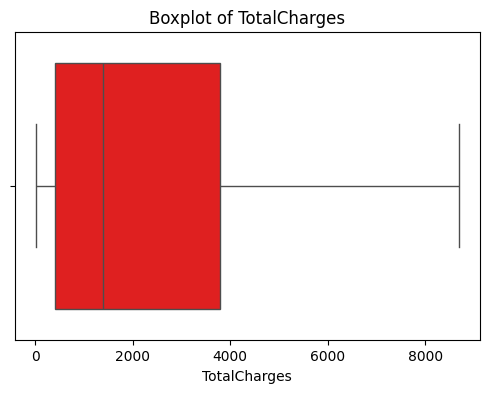

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=eda_data[col], color='red')
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


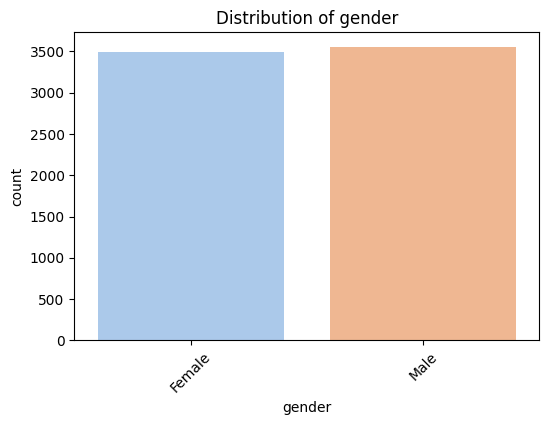

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


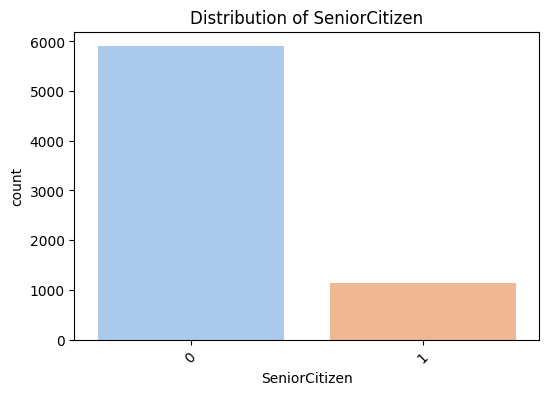

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


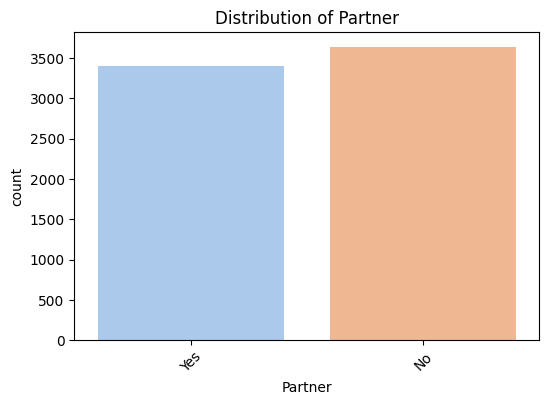

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


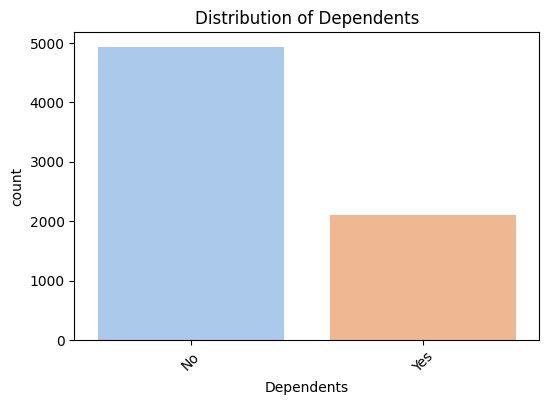

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


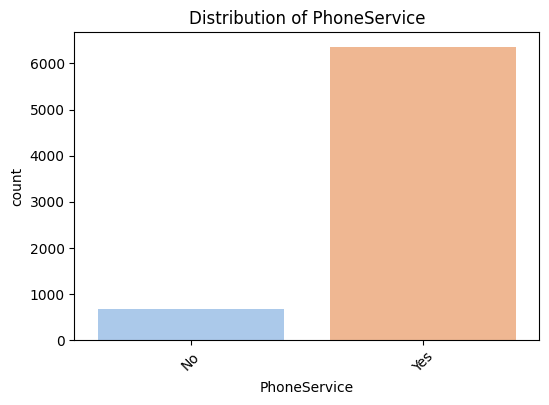

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


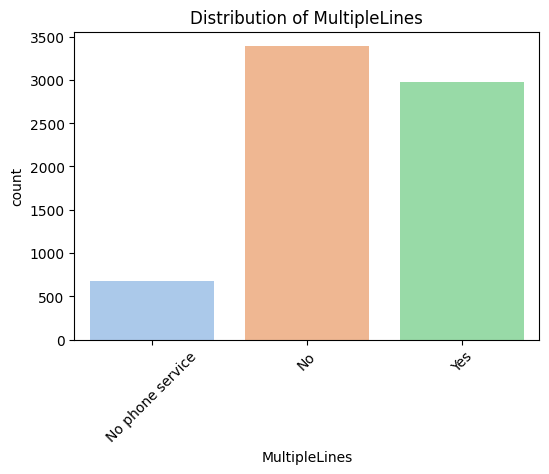

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


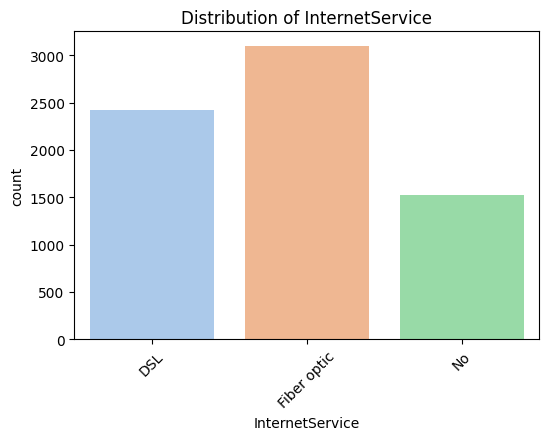

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


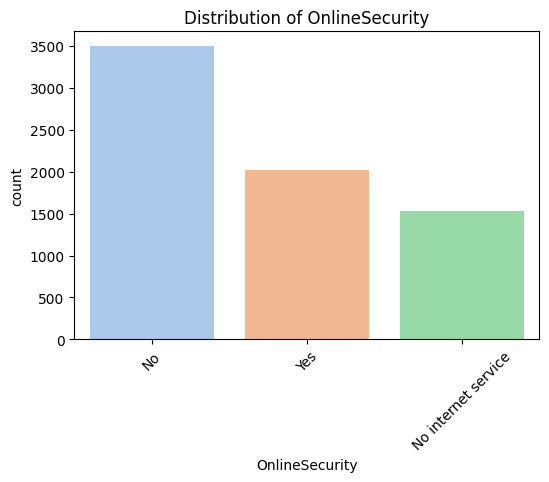

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


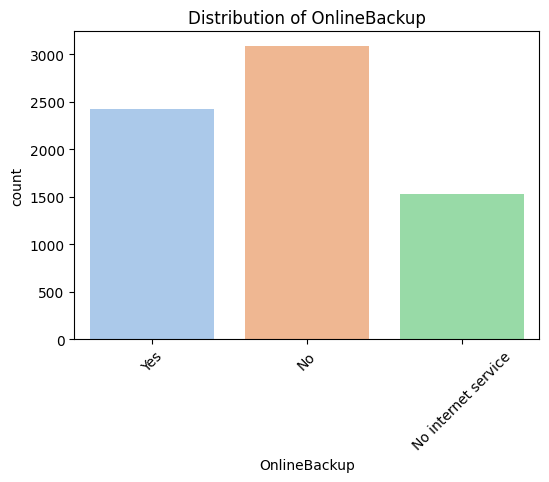

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


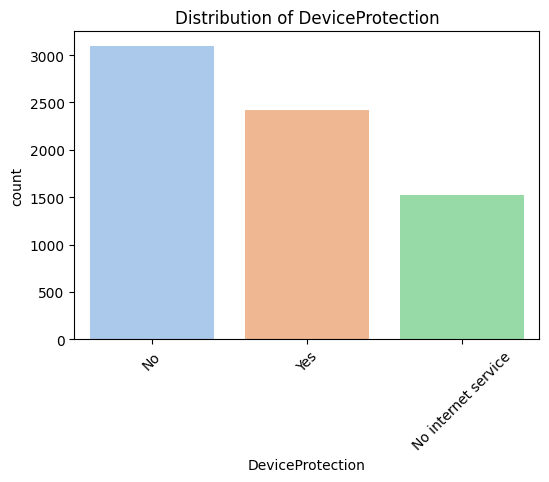

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


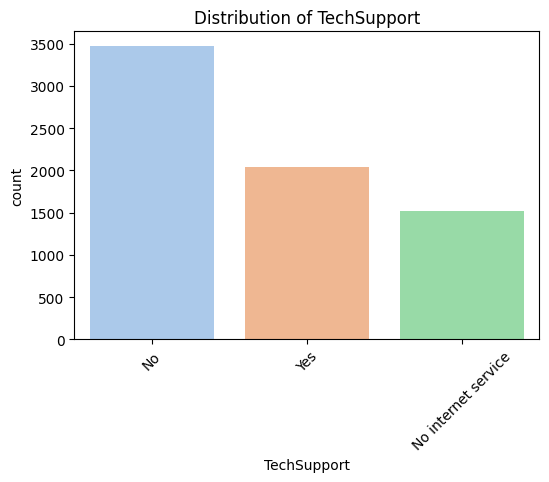

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


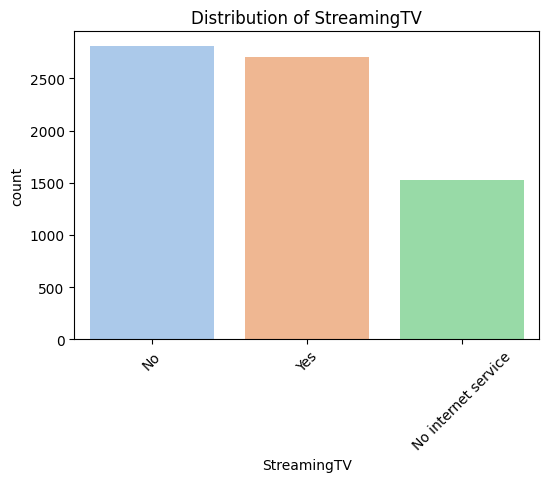

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


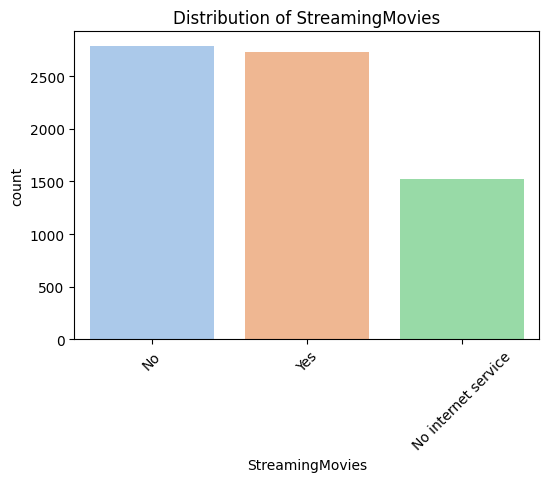

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


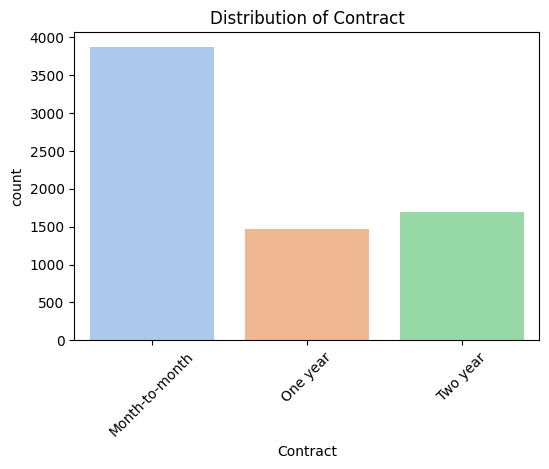

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


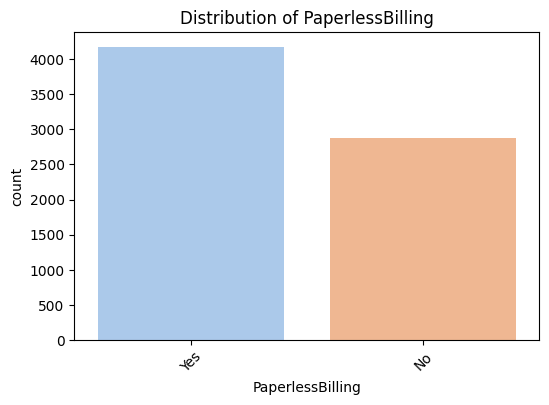

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


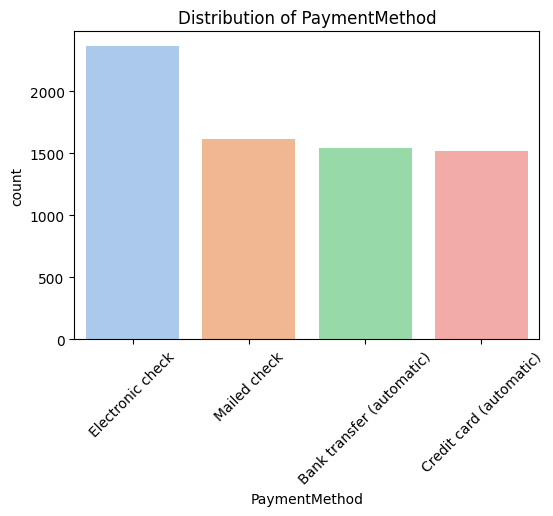

/tmp/ipython-input-2725006129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='pastel')


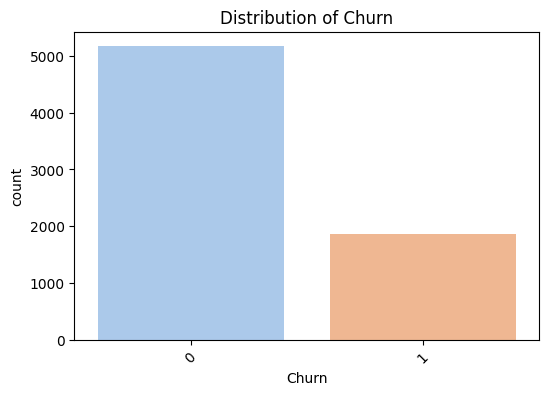

In [16]:
for col in datacopy:
    plt.figure(figsize=(6,4))
    sns.countplot(data=eda_data, x=col, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


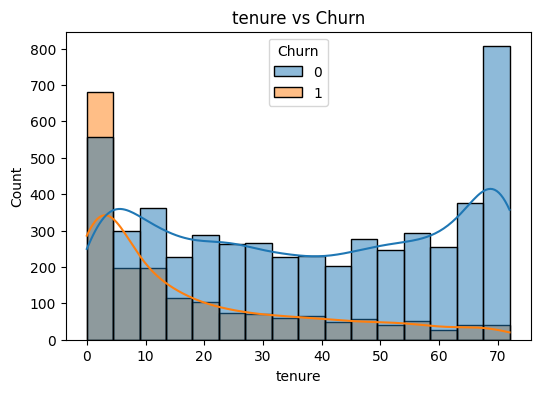

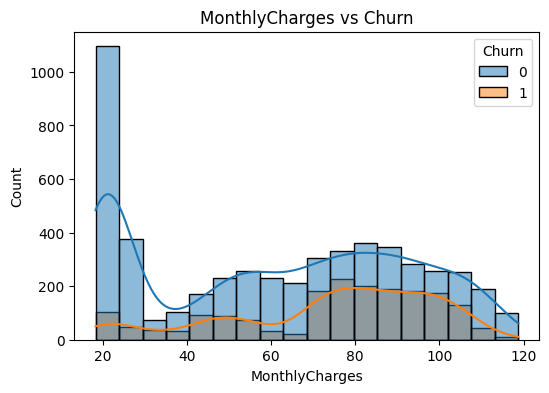

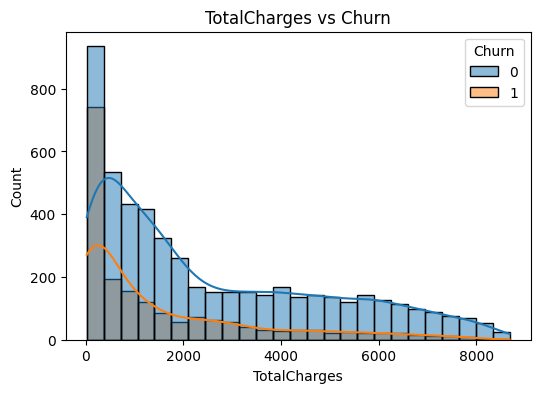

In [17]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=eda_data, x=col, hue='Churn', kde=True)
    plt.title(f"{col} vs Churn")
    plt.show()

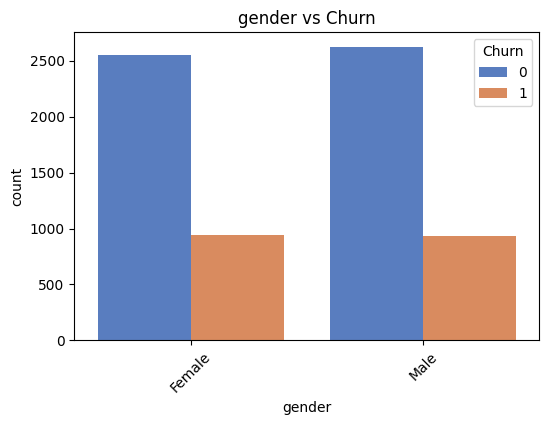

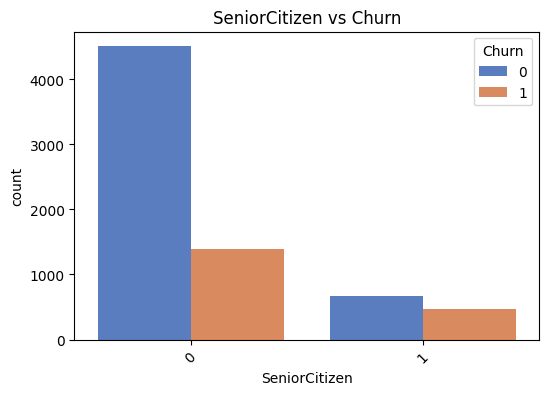

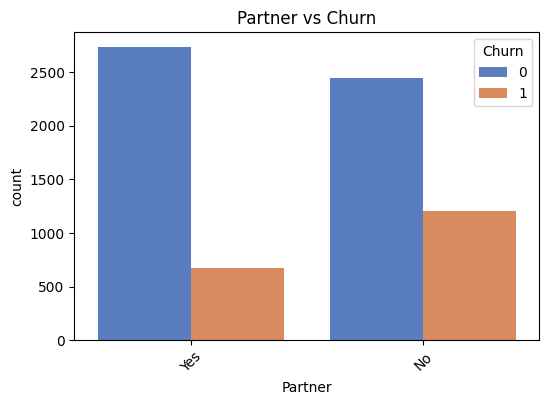

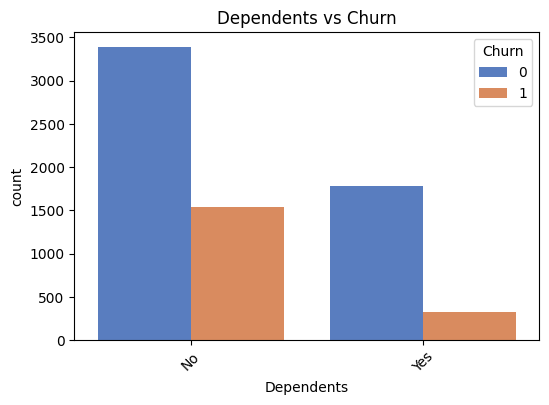

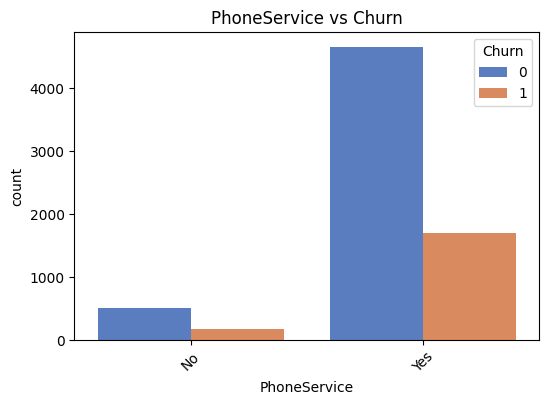

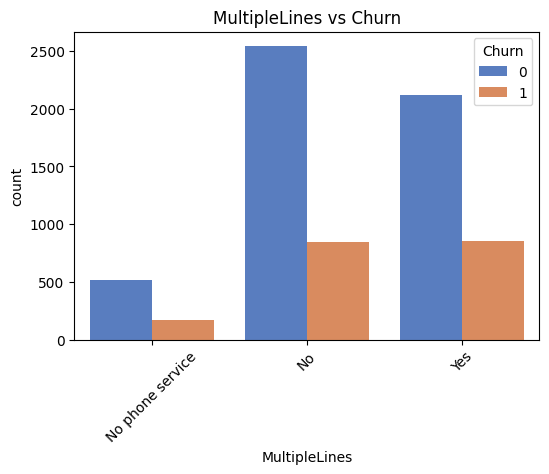

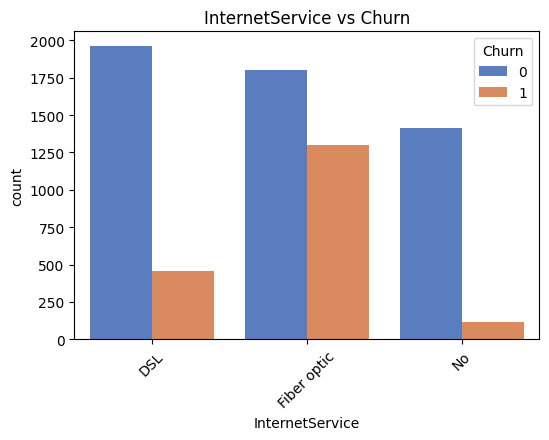

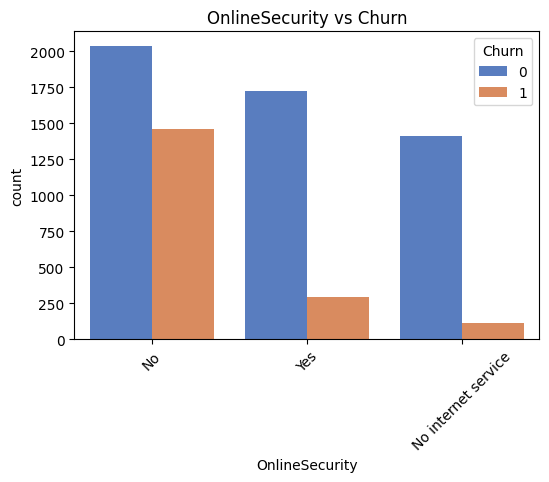

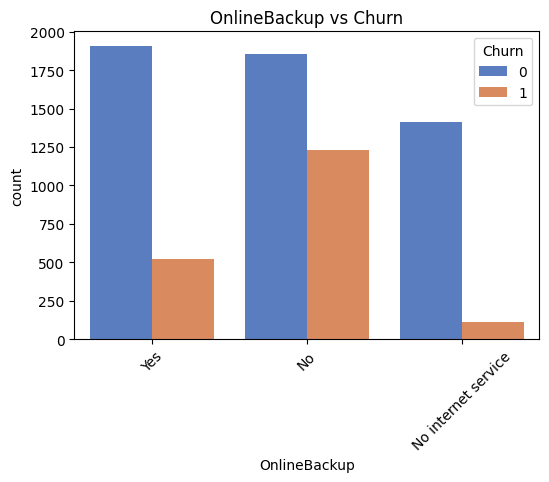

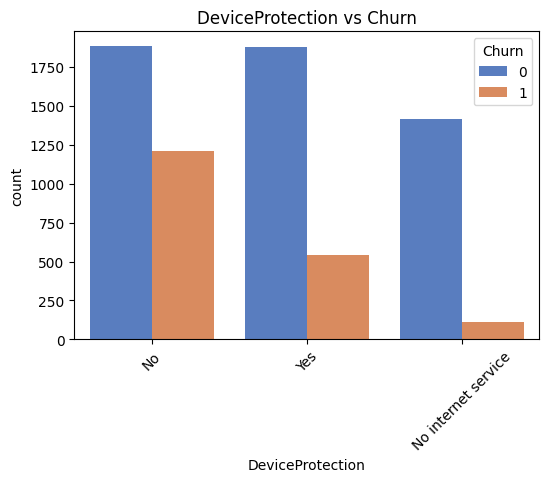

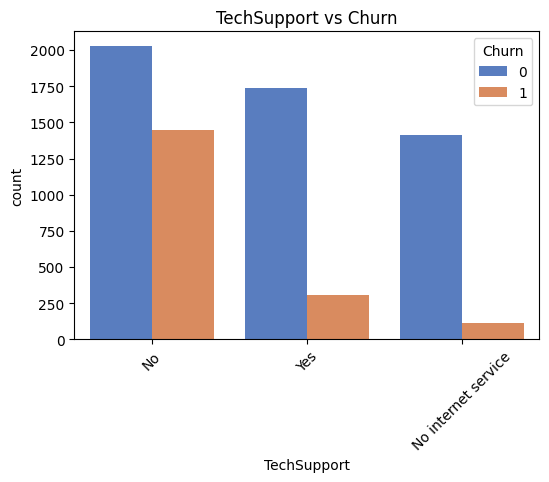

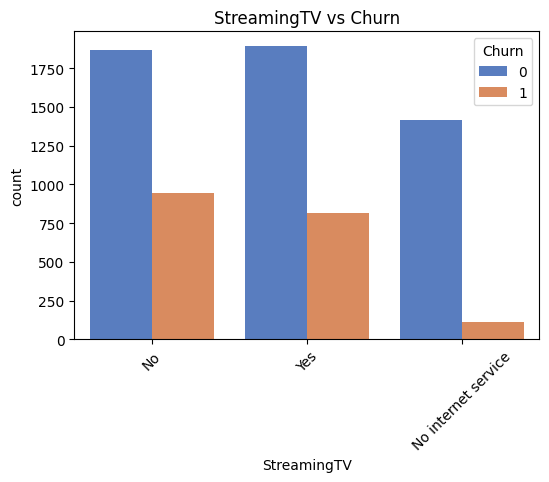

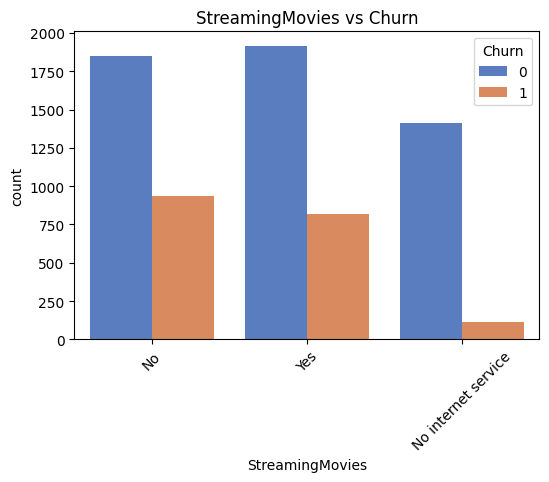

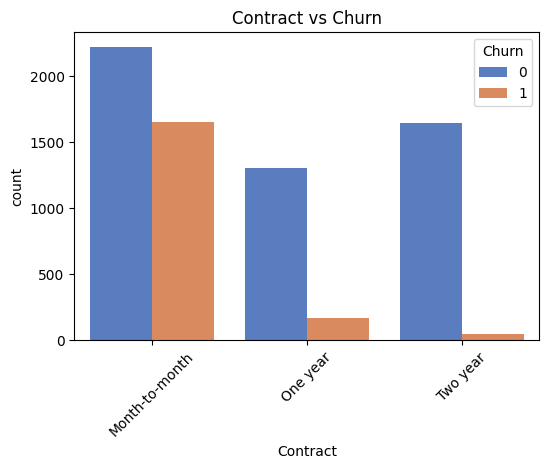

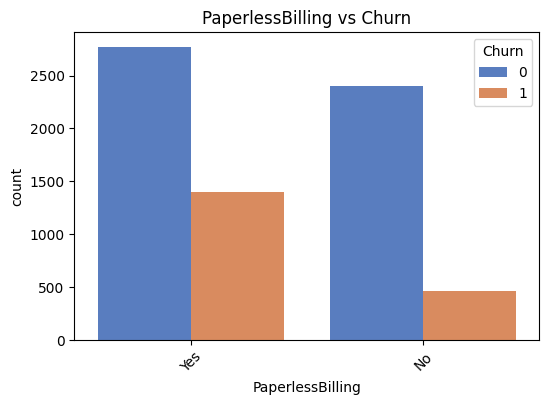

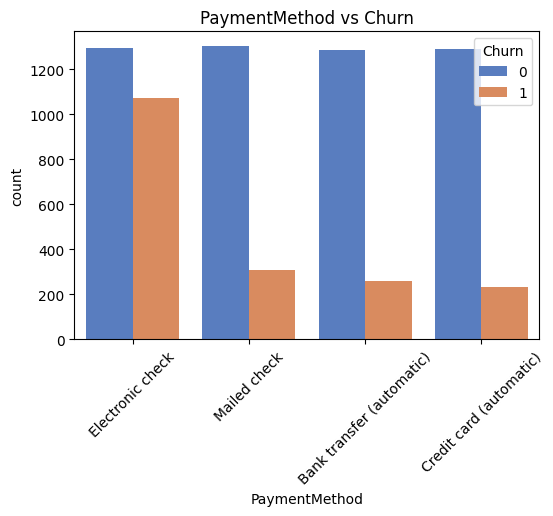

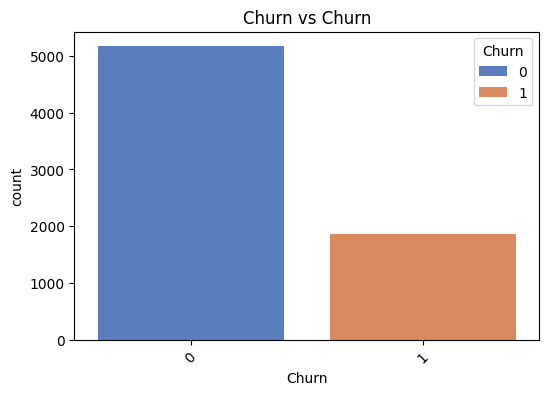

In [18]:
for col in datacopy:
    plt.figure(figsize=(6,4))
    sns.countplot(data=eda_data, x=col, hue='Churn', palette='muted')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

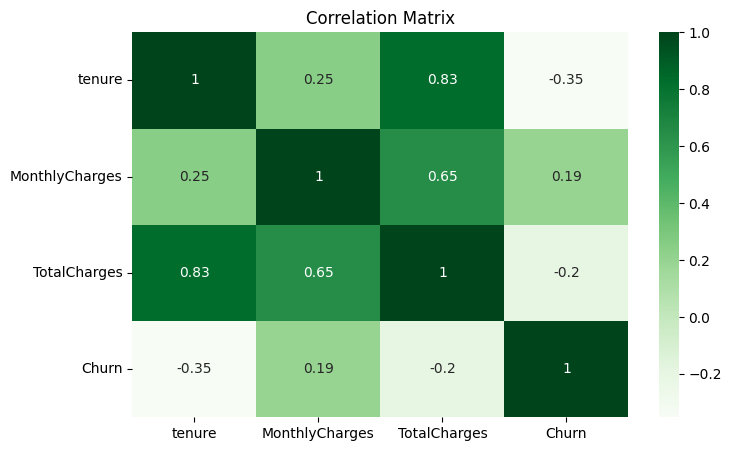

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(eda_data[num_cols + ['Churn']].corr(), annot=True, cmap='Greens')
plt.title("Correlation Matrix")
plt.show()


# **PreProcessing**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Converting TotalCharges to numeric
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn['TotalCharges'], errors='coerce')

# Checking missing values created by conversion
print("Missing TotalCharges after conversion:", telco_churn['TotalCharges'].isna().sum())

# Droping rows with missing values
telco_churn = telco_churn.dropna().reset_index(drop=True)

#dataset shape after droping
print("Rows after droping ::" , telco_churn.shape[0])

Missing TotalCharges after conversion: 11
Rows after droping :: 7032


In [22]:
#converting target variable to numeric in the main dataset
telco_churn['Churn'] = telco_churn['Churn'].map({'Yes': 1, 'No': 0})

telco_churn = telco_churn.drop(columns=['customerID'])

# **Feature Engineering**

In [23]:
# Select categorical columns
cat_cols = telco_churn.select_dtypes(include=['object']).columns

# One-hot encode
telco_churn = pd.get_dummies(telco_churn, columns=cat_cols, drop_first=True)


In [24]:
telco_churn['TenureGroup'] = pd.cut(
    telco_churn['tenure'],
    bins=[0, 12, 24, 48, 60, 100],
    labels=['0-12', '12-24', '24-48', '48-60', '60+']
)

In [25]:
service_yes_cols = [
    'PhoneService_Yes',
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'InternetService_Fiber optic'
]

telco_churn['TotalServices'] = telco_churn[service_yes_cols].sum(axis=1)


In [26]:
telco_churn['HasFiber'] = telco_churn['InternetService_Fiber optic']


In [27]:
telco_churn['ContractRisk'] = (
    3 * (1 - telco_churn['Contract_One year'] - telco_churn['Contract_Two year']) +
    2 * telco_churn['Contract_One year'] +
    1 * telco_churn['Contract_Two year']
)


In [28]:
telco_churn['ChargeTenureInteraction'] = telco_churn['MonthlyCharges'] * telco_churn['tenure']


In [29]:
# Encode remaining object columns such as TenureGroup
cat_cols = telco_churn.select_dtypes(include=['category']).columns

if len(cat_cols) > 0:
    telco_churn = pd.get_dummies(telco_churn, columns=cat_cols, drop_first=True)


In [30]:
telco_churn.select_dtypes(include=['category']).columns


Index([], dtype='object')

In [31]:
telco_churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalServices,HasFiber,ContractRisk,ChargeTenureInteraction,TenureGroup_12-24,TenureGroup_24-48,TenureGroup_48-60,TenureGroup_60+
0,0,1,29.85,29.85,0,False,True,False,False,True,...,True,False,1,False,3,29.85,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,True,3,False,2,1936.30,False,True,False,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,True,3,False,3,107.70,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,3,False,2,1903.50,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,True,False,2,True,3,141.40,False,False,False,False


In [32]:
X = telco_churn.drop('Churn', axis=1)
y = telco_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 38)
Test shape: (1407, 38)


# **Decision Tree Model**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

telco_churn_baseline = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

telco_churn_baseline.fit(X_train, y_train)

# Predictions on test set
y_pred_baseline = telco_churn_baseline.predict(X_test)

# Baseline Evaluation
print("BASELINE DECISION TREE CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_baseline))

BASELINE DECISION TREE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1033
           1       0.50      0.48      0.49       374

    accuracy                           0.73      1407
   macro avg       0.66      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



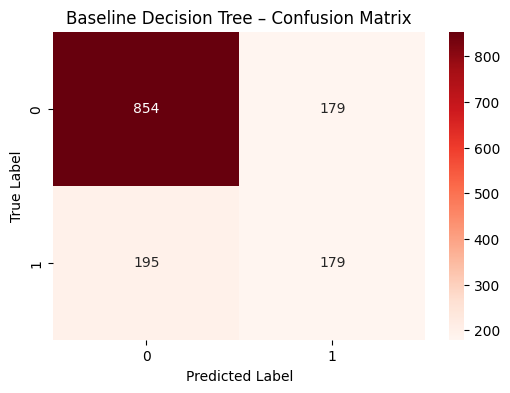

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_baseline),
    annot=True,
    fmt="d",
    cmap="Reds"
)
plt.title("Baseline Decision Tree – Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


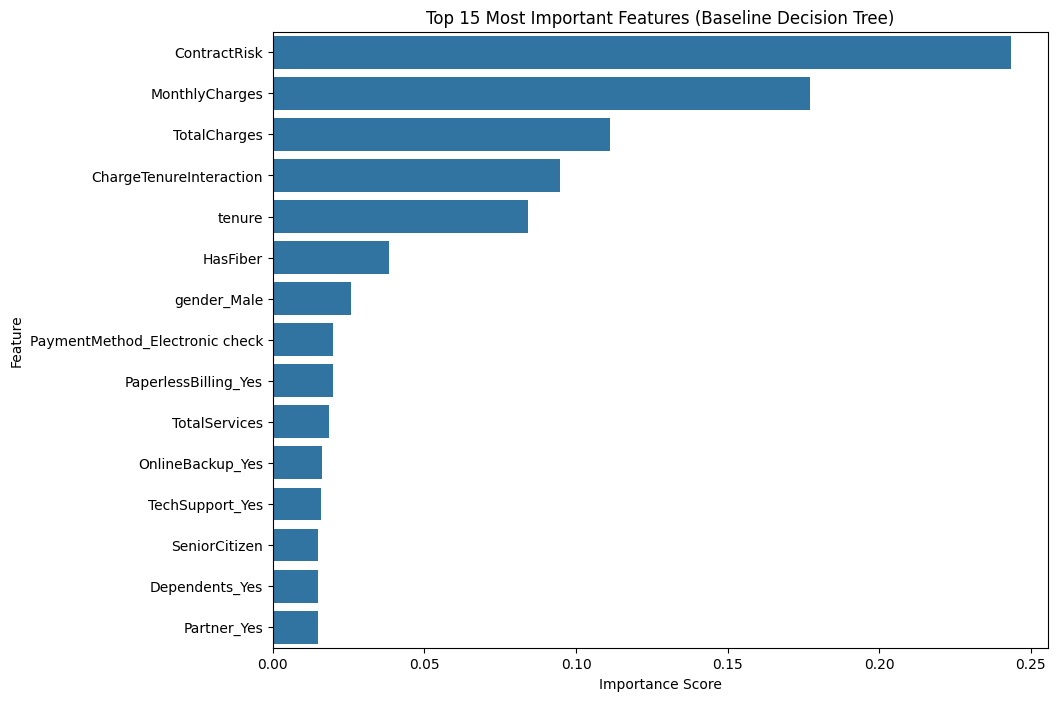

In [42]:
# Extract feature importances
importances = telco_churn_baseline.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,8))
sns.barplot(
    x=importances[indices][:15],
    y=feature_names[indices][:15]
)
plt.title("Top 15 Most Important Features (Baseline Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [45]:
#hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 12, None],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf': [1, 3, 6]
}

dt_model = DecisionTreeClassifier(
    random_state=42
)

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best ROC-AUC: 0.8305564012325645


In [46]:
# Retrieve best estimator
best_dt = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_dt.predict(X_test)

print("TUNED DECISION TREE CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_best))


TUNED DECISION TREE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.47      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



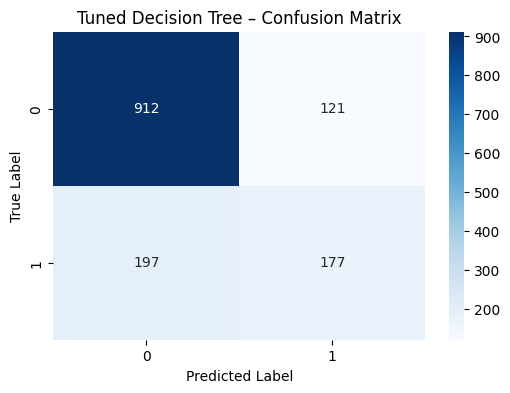

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Tuned Decision Tree – Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


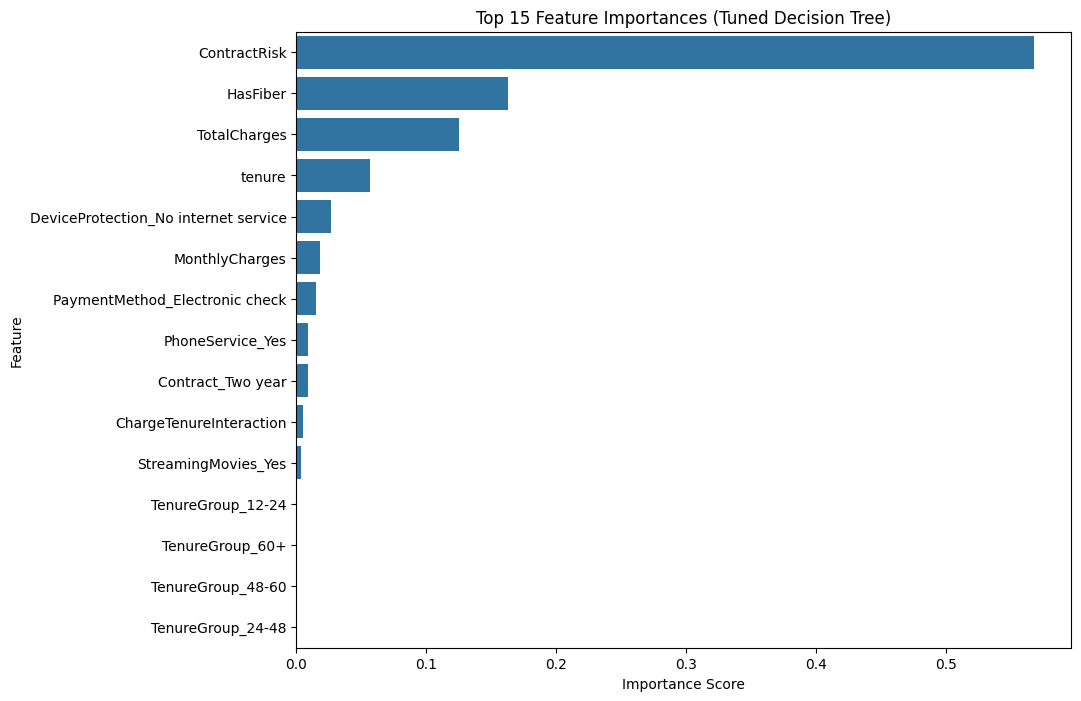

In [49]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,8))
sns.barplot(
    x=importances[indices][:15],
    y=X_train.columns[indices][:15]
)
plt.title("Top 15 Feature Importances (Tuned Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# **Neural Network**

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

#SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled  = scaler.transform(X_test)

#Class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_sm),
    y=y_train_sm
)
class_weights = {0: weights[0], 1: weights[1]}

#Model
def make_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.15),

        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = make_model(X_train_scaled.shape[1])
model.summary()

history = model.fit(
    X_train_scaled, y_train_sm,
    validation_data=(X_test_scaled, y_test),
    epochs=25,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[es, mc],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
246/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.5175
Epoch 1: val_loss improved from inf to 0.47894, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7459 - loss: 0.5146 - val_accuracy: 0.7612 - val_loss: 0.4789
Epoch 2/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8231 - loss: 0.3915
Epoch 2: val_loss improved from 0.47894 to 0.46130, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8231 - loss: 0.3915 - val_accuracy: 0.7825 - val_loss: 0.4613
Epoch 3/25
250/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.3734
Epoch 3: val_loss improved from 0.46130 to 0.45518, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8333 - loss: 0.3731 - val_accuracy: 0.7733 - val_loss: 0.4552
Epoch 4/25
254/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.3496
Epoch 4: val_loss did not improve from 0.45518
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3496 - val_accuracy: 0.7747 - val_loss: 0.4603
Epoch 5/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.3433
Epoch 5: val_loss improved from 0.45518 to 0.45006, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8389 - loss: 0.3433 - val_accuracy: 0.7889 - val_loss: 0.4501
Epoch 6/25
249/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 0.3382
Epoch 6: val_loss improved from 0.45006 to 0.44946, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8482 - loss: 0.3379 - val_accuracy: 0.7804 - val_loss: 0.4495
Epoch 7/25
254/259 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8473 - loss: 0.3374
Epoch 7: val_loss did not improve from 0.44946
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8473 - loss: 0.3373 - val_accuracy: 0.7832 - val_loss: 0.4518
Epoch 8/25
250/259 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8511 - loss: 0.3279
Epoch 8: val_loss improved from 0.44946 to 0.44421, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8511 - loss: 0.3280 - val_accuracy: 0.7811 - val_loss: 0.4442
Epoch 9/25
245/259 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8523 - loss: 0.3177
Epoch 9: val_loss did not improve from 0.44421
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8522 - loss: 0.3178 - val_accuracy: 0.7711 - val_loss: 0.4533
Epoch 10/25
257/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8502 - loss: 0.3209
Epoch 10: val_loss improved from 0.44421 to 0.44291, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8503 - loss: 0.3208 - val_accuracy: 0.7783 - val_loss: 0.4429
Epoch 11/25
245/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3139
Epoch 11: val_loss improved from 0.44291 to 0.44210, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3139 - val_accuracy: 0.7846 - val_loss: 0.4421
Epoch 12/25
243/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8577 - loss: 0.3112
Epoch 12: val_loss improved from 0.44210 to 0.44002, saving model to best_nn_model.h5


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3113 - val_accuracy: 0.7839 - val_loss: 0.4400
Epoch 13/25
253/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3078
Epoch 13: val_loss did not improve from 0.44002
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3078 - val_accuracy: 0.7854 - val_loss: 0.4462
Epoch 14/25
252/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.3133
Epoch 14: val_loss did not improve from 0.44002
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8529 - loss: 0.3131 - val_accuracy: 0.7811 - val_loss: 0.4427
Epoch 15/25
254/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.2941
Epoch 15: val_loss did not improve from 0.44002
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.2944 - val_accuracy: 0.7804 - val_loss: 0.4442
Epoch 16/25
249/259 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8685 - loss: 0.2960
Epoch 16: val_loss did not improve from 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


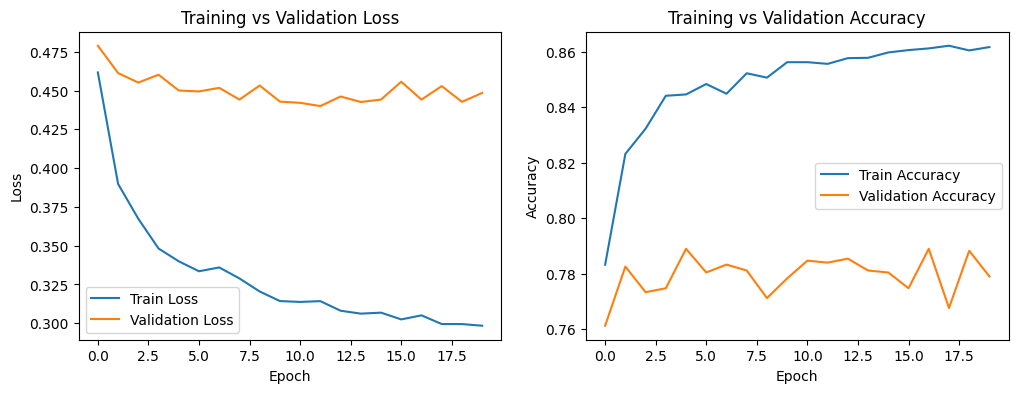

In [68]:
# Check what keys exist in the history object
print(history.history.keys())

plt.figure(figsize=(12,4))

#LOSS PLOT
plt.subplot(1,2,1)
plt.plot(history.history.get('loss'), label='Train Loss')

if 'val_loss' in history.history:
    plt.plot(history.history.get('val_loss'), label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#ACCURACY PLOT
plt.subplot(1,2,2)
plt.plot(history.history.get('accuracy'), label='Train Accuracy')

if 'val_accuracy' in history.history:
    plt.plot(history.history.get('val_accuracy'), label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [69]:
checkpoint_path = "best_nn_model.h5"
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report
              precision    recall  f1-score   support

           0     0.8269    0.8925    0.8585      1033
           1     0.6199    0.4840    0.5435       374

    accuracy                         0.7839      1407
   macro avg     0.7234    0.6883    0.7010      1407
weighted avg     0.7719    0.7839    0.7748      1407



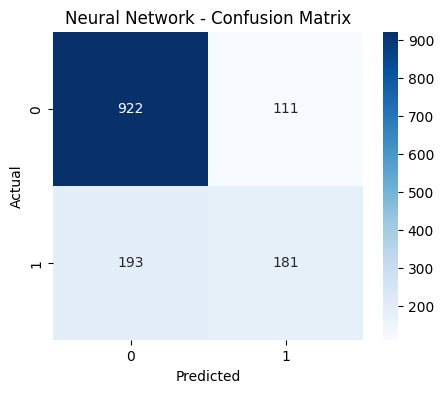

In [70]:
# Load best model (if ModelCheckpoint saved)
best_model = tf.keras.models.load_model(checkpoint_path)

# Predict probabilities and class labels
y_proba = best_model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= 0.5).astype(int)

# Classification report
print("Classification Report")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


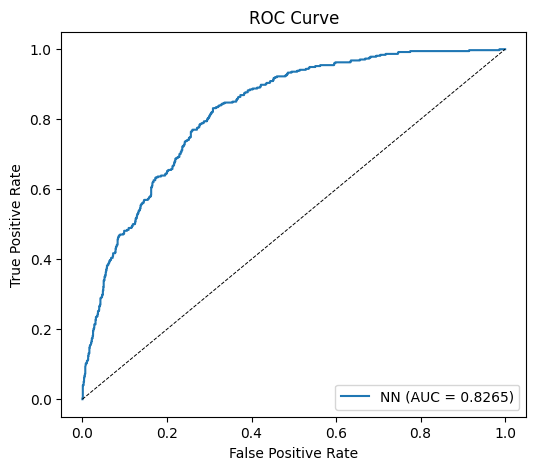

AUC: 0.8265151083754807


In [71]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'NN (AUC = {roc_auc:.4f})')
# Optionally plot Decision Tree AUC if you have dt_proba
# plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC = {auc_dt:.4f})')
plt.plot([0,1],[0,1],'k--', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc)


In [72]:
X_train.shape

(5625, 38)

In [73]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
best_threshold = thresholds[np.argmax(tpr - fpr)]
print(best_threshold)

0.29008016


In [76]:
input_dim = X_train_scaled.shape[1]

def build_optimized_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.15),

        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.10),

        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0008),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_optimized_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,345 (20.88 KB)

 Non-trainable params: 224 (896.00 B)

In [77]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


In [78]:
cw = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = {0: cw[0], 1: cw[1]}
class_weights


{0: np.float64(0.6809927360774818), 1: np.float64(1.8812709030100334)}

In [80]:
history = model.fit(
    X_train_scaled, y_train_sm,
    validation_split=0.20,
    epochs=80,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

Epoch 1/80
104/104 - 7s - 63ms/step - accuracy: 0.6892 - loss: 0.7420 - val_accuracy: 0.9655 - val_loss: 0.3871 - learning_rate: 8.0000e-04
Epoch 2/80
104/104 - 0s - 4ms/step - accuracy: 0.7320 - loss: 0.6282 - val_accuracy: 0.9661 - val_loss: 0.2953 - learning_rate: 8.0000e-04
Epoch 3/80
104/104 - 0s - 4ms/step - accuracy: 0.7456 - loss: 0.5967 - val_accuracy: 0.9655 - val_loss: 0.2585 - learning_rate: 8.0000e-04
Epoch 4/80
104/104 - 0s - 4ms/step - accuracy: 0.7562 - loss: 0.5831 - val_accuracy: 0.9631 - val_loss: 0.2420 - learning_rate: 8.0000e-04
Epoch 5/80
104/104 - 0s - 4ms/step - accuracy: 0.7621 - loss: 0.5666 - val_accuracy: 0.9673 - val_loss: 0.2268 - learning_rate: 8.0000e-04
Epoch 6/80
104/104 - 0s - 4ms/step - accuracy: 0.7638 - loss: 0.5601 - val_accuracy: 0.9818 - val_loss: 0.2127 - learning_rate: 8.0000e-04
Epoch 7/80
104/104 - 0s - 4ms/step - accuracy: 0.7680 - loss: 0.5533 - val_accuracy: 0.9818 - val_loss: 0.2120 - learning_rate: 8.0000e-04
Epoch 8/80
104/104 - 1s - 

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Optimized Neural Network Classification Report
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1033
           1       0.43      0.87      0.58       374

    accuracy                           0.66      1407
   macro avg       0.68      0.73      0.65      1407
weighted avg       0.80      0.66      0.68      1407



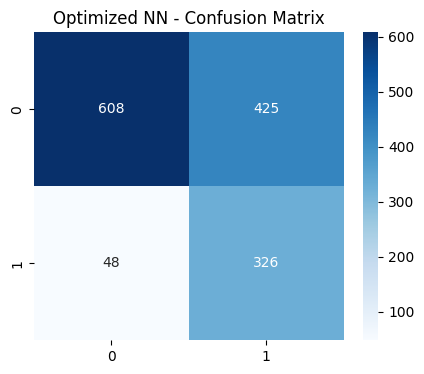

In [82]:
y_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= best_threshold).astype(int)

print("Optimized Neural Network Classification Report")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Optimized NN - Confusion Matrix')
plt.show()


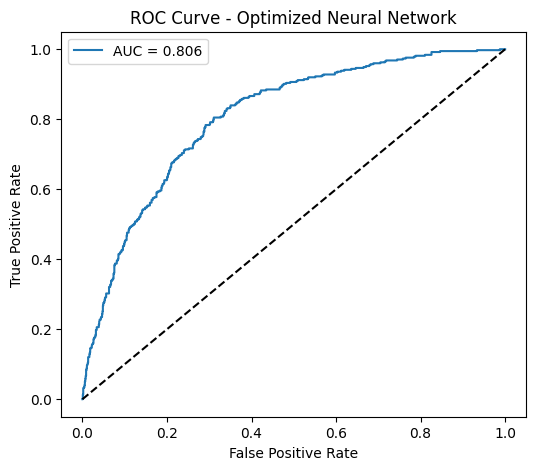

np.float64(0.8062118537461627)

In [83]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized Neural Network")
plt.legend()
plt.show()

roc_auc


In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)